In [1]:

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import quandl
import scipy.optimize as sco
import datetime as dt
import yfinance as yf
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [2]:
assets = ['OXY','EQT','MPC','ENPH','HES','XOM','GOOG']
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(2 * 365)

adj_close = yf.download(assets, start=start_date, end=end_date)['Adj Close']

[*********************100%***********************]  7 of 7 completed


In [12]:
returns = adj_close.pct_change()[1:]
mean_returns = returns.mean()
cov_matrix = returns.cov()
var_matrix = returns.var()

In [13]:
returns

,ENPH,EQT,GOOG,HES,MPC,OXY,XOM
Date,,,,,,,
2020-11-03,0.008861,-0.039431,0.014871,-0.029706,0.019489,0.004145,-0.017064
2020-11-04,0.013747,-0.044415,0.059944,0.008399,-0.006581,0.012384,-0.005388
2020-11-05,0.132498,0.004225,0.008141,-0.005911,0.004101,0.067278,-0.001806
2020-11-06,0.018876,-0.007714,-0.000919,-0.013784,-0.007854,-0.043935,-0.011757
2020-11-09,-0.044479,-0.046643,0.000710,0.189093,0.154845,0.221778,0.126601
...,...,...,...,...,...,...,...
2022-10-25,0.048520,0.033133,0.019035,-0.003743,-0.000179,0.003671,-0.006754
2022-10-26,0.098950,-0.014899,-0.096350,0.048177,0.015075,0.020115,0.011900
2022-10-27,0.048686,0.002307,-0.023413,-0.003795,0.004685,-0.008963,0.003827


In [14]:
cov_matrix

,ENPH,EQT,GOOG,HES,MPC,OXY,XOM
ENPH,0.001983,0.000240,0.000332,0.000148,0.000168,0.000265,0.000061
EQT,0.000240,0.001268,0.000101,0.000514,0.000357,0.000620,0.000346
GOOG,0.000332,0.000101,0.000375,0.000115,0.000128,0.000122,0.000080
HES,0.000148,0.000514,0.000115,0.000894,0.000567,0.000907,0.000543
MPC,0.000168,0.000357,0.000128,0.000567,0.000563,0.000664,0.000420
OXY,0.000265,0.000620,0.000122,0.000907,0.000664,0.001513,0.000661
XOM,0.000061,0.000346,0.000080,0.000543,0.000420,0.000661,0.000481


In [15]:
var_matrix

ENPH    0.001983
EQT     0.001268
GOOG    0.000375
HES     0.000894
MPC     0.000563
OXY     0.001513
XOM     0.000481
dtype: float64

/tmp/ipykernel_288495/598253406.py:32: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.count()]
/tmp/ipykernel_288495/598253406.py:55: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar()


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualized Return: 0.79
Annualized Volatility: 0.34


                 ENPH       EQT      GOOG       HES      MPC       OXY  \
allocations  0.184317  0.061903  0.004732  0.034461  0.26894  0.109474   

                  XOM  
allocations  0.336174  
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualized Return: 0.43
Annualized Volatility: 0.26


                ENPH       EQT      GOOG       HES       MPC       OXY  \
allocation  0.065155  0.012431  0.507864  0.066557  0.013919  0.018498   

                 XOM  
allocation  0.315576  


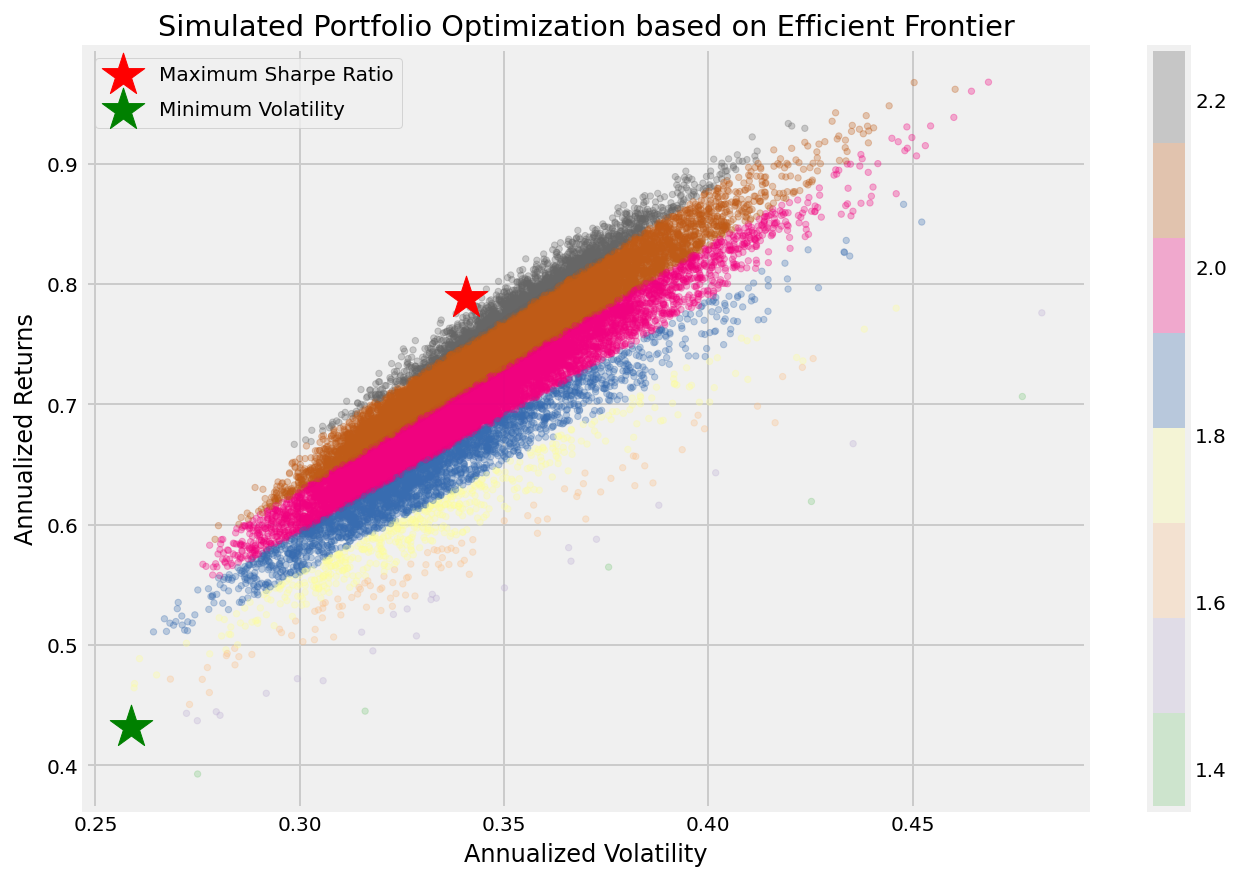

In [25]:
def random_portfolios(num_portfoliios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3, num_portfolios))
    weights_record = []
    num_assets= 7
    for i in range(num_portfolios):
        weights = np.random.random(num_assets)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

returns = adj_close.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * (weights )) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0, max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx], index=adj_close.columns,columns=['allocations'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.count()]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=adj_close.columns,columns=['allocation'])
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("Annualized Return:", round(rp,2))
    print("Annualized Volatility:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualized Return:",round(rp_min,2))
    print("Annualized Volatility:",round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:], results[1,:],c=results[2,:],cmap='Accent', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label = 'Maximum Sharpe Ratio')
    plt.scatter(sdp_min,rp_min,marker='*', color='g',s=500, label='Minimum Volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Returns')
    plt.legend(labelspacing=0.8)

display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)